In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data = pd.read_excel('sales.xlsx')

In [99]:
data

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0


In [100]:
data.shape

(4520, 20)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [102]:
data.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [103]:
## numerical features
numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_feature

['CustID',
 'AgentBonus',
 'Age',
 'CustTenure',
 'ExistingProdType',
 'NumberOfPolicy',
 'MonthlyIncome',
 'Complaint',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore']

In [104]:
##continuous and discrete features
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+['CustID']]

In [105]:
continuous_feature

['AgentBonus',
 'Age',
 'CustTenure',
 'MonthlyIncome',
 'ExistingPolicyTenure',
 'SumAssured']

In [106]:
discrete_feature

['ExistingProdType',
 'NumberOfPolicy',
 'Complaint',
 'LastMonthCalls',
 'CustCareScore']

In [107]:
## categorical feature
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_feature

['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus',
 'Zone',
 'PaymentMethod']

In [108]:
cat = []
for category in categorical_feature:
        cat.append(data[category].unique())

In [109]:
cat

[array(['Agent', 'Third Party Partner', 'Online'], dtype=object),
 array(['Salaried', 'Free Lancer', 'Small Business', 'Laarge Business',
        'Large Business'], dtype=object),
 array(['Graduate', 'Post Graduate', 'UG', 'Under Graduate', 'Engineer',
        'Diploma', 'MBA'], dtype=object),
 array(['Female', 'Male', 'Fe male'], dtype=object),
 array(['Manager', 'Exe', 'Executive', 'VP', 'AVP', 'Senior Manager'],
       dtype=object),
 array(['Single', 'Divorced', 'Unmarried', 'Married'], dtype=object),
 array(['North', 'West', 'East', 'South'], dtype=object),
 array(['Half Yearly', 'Yearly', 'Quarterly', 'Monthly'], dtype=object)]

In [110]:
data['Occupation'] = data['Occupation'].replace(to_replace='Laarge Business', value='Large Business')
data['Occupation'] = data['Occupation'].replace(to_replace='Free Lancer', value='Freelancer')
data['EducationField'] = data['EducationField'].replace(to_replace='UG', value='Under Graduate')
data['Gender'] = data['Gender'].replace(to_replace='Fe male', value='Female')
data['Designation'] = data['Designation'].replace(to_replace='Exe', value='Executive')
data['Designation'] = data['Designation'].replace(to_replace='Senior Manager', value='Senior_Manager')

In [111]:
cat = []
for category in categorical_feature:
        cat.append(data[category].unique())

In [112]:
cat

[array(['Agent', 'Third Party Partner', 'Online'], dtype=object),
 array(['Salaried', 'Freelancer', 'Small Business', 'Large Business'],
       dtype=object),
 array(['Graduate', 'Post Graduate', 'Under Graduate', 'Engineer',
        'Diploma', 'MBA'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Manager', 'Executive', 'VP', 'AVP', 'Senior_Manager'],
       dtype=object),
 array(['Single', 'Divorced', 'Unmarried', 'Married'], dtype=object),
 array(['North', 'West', 'East', 'South'], dtype=object),
 array(['Half Yearly', 'Yearly', 'Quarterly', 'Monthly'], dtype=object)]

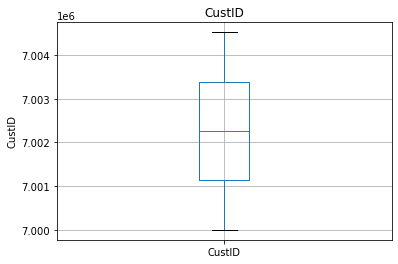

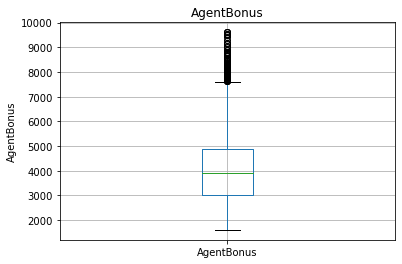

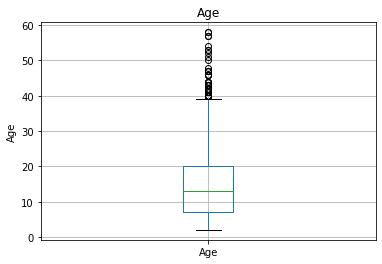

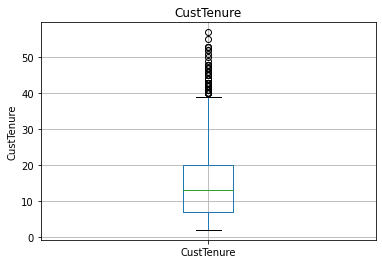

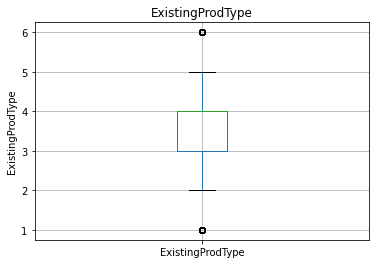

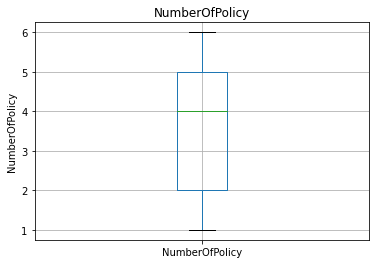

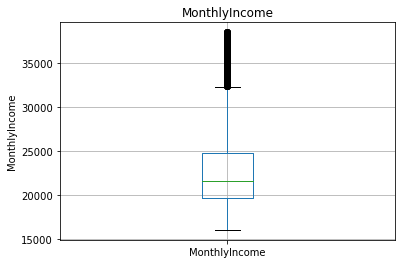

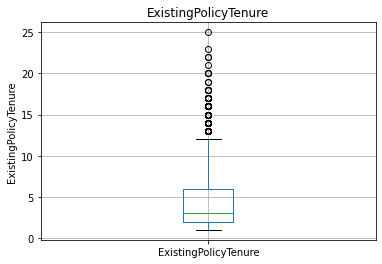

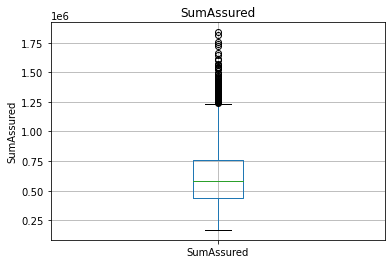

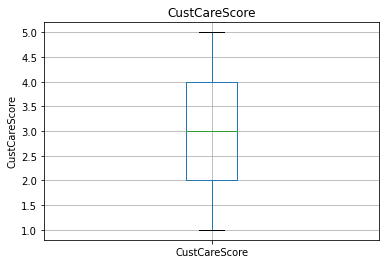

In [113]:
## outliers

for feature in numerical_feature:
    if 0 in data[feature].unique():
        pass
    else:
        #df[feature]=np.log(df[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [114]:
## Age column have invalid values. We will drop the columns that have missing values and have values < 18

df = data

In [115]:
df

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Freelancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior_Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0


In [116]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [117]:
df.isnull().sum() * 100 / len(df)

CustID                  0.000000
AgentBonus              0.000000
Age                     5.951327
CustTenure              5.000000
Channel                 0.000000
Occupation              0.000000
EducationField          0.000000
Gender                  0.000000
ExistingProdType        0.000000
Designation             0.000000
NumberOfPolicy          0.995575
MaritalStatus           0.000000
MonthlyIncome           5.221239
Complaint               0.000000
ExistingPolicyTenure    4.070796
SumAssured              3.407080
Zone                    0.000000
PaymentMethod           0.000000
LastMonthCalls          0.000000
CustCareScore           1.150442
dtype: float64

In [118]:
## As data are skewed, we use impute missing values with median.
##handling missing data
df['Age'] = df['Age'].fillna(df['Age'].median())
df['CustTenure'] = df['CustTenure'].fillna(df['CustTenure'].median())
df['NumberOfPolicy'] = df['NumberOfPolicy'].fillna(df['NumberOfPolicy'].median())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['ExistingPolicyTenure'] = df['ExistingPolicyTenure'].fillna(df['ExistingPolicyTenure'].median())
df['SumAssured'] = df['SumAssured'].fillna(df['SumAssured'].median())
df['CustCareScore'] = df['CustCareScore'].fillna(df['CustCareScore'].median())

In [119]:
df.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [120]:
## Outliers

In [121]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 24)
    q3 = np.percentile(data, 76)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df['ExistingPolicyTenure'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 20.0, 20.0, 20.0, 21.0, 22.0, 22.0, 23.0, 25.0]


In [122]:
# Detect Outliers
q1 = np.percentile(df['ExistingPolicyTenure'], 24)
q3 = np.percentile(df['ExistingPolicyTenure'], 76)

In [123]:
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

In [124]:
df.drop(df[ (df.ExistingPolicyTenure > upr_bound) | (df.ExistingPolicyTenure < lwr_bound) ].index , inplace=True)

In [125]:
df

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Freelancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090.0,1,2.0,578976.5,North,Yearly,0,3.0
3,7000003,1791,11.0,13.0,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,13.0,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior_Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,21606.0,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0


In [126]:
q1 = np.percentile(df['CustTenure'], 24)
q3 = np.percentile(df['CustTenure'], 76)

In [127]:
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

In [128]:
df.drop(df[ (df.CustTenure > upr_bound) | (df.CustTenure < lwr_bound) ].index , inplace=True)

In [129]:
df

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Freelancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090.0,1,2.0,578976.5,North,Yearly,0,3.0
3,7000003,1791,11.0,13.0,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,13.0,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior_Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,21606.0,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0


### One-hot encoding

In [130]:
## one hot encoding

obj = df[['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus',
 'Zone',
 'PaymentMethod']]
num = df.drop(['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus',
 'Zone',
 'PaymentMethod'], axis = 1)
encode = pd.get_dummies(obj, drop_first = True)
df = pd.concat([num, encode], axis = 1)

In [131]:
df

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,7000000,4409,22.0,4.0,3,2.0,20993.0,1,2.0,806761.0,...,0,0,1,0,1,0,0,0,0,0
1,7000001,2214,11.0,2.0,4,4.0,20130.0,0,3.0,294502.0,...,0,0,0,0,1,0,0,0,0,1
2,7000002,4273,26.0,4.0,4,3.0,17090.0,1,2.0,578976.5,...,0,0,0,1,1,0,0,0,0,1
3,7000003,1791,11.0,13.0,3,3.0,17909.0,1,2.0,268635.0,...,0,0,0,0,0,0,1,0,0,0
4,7000004,2955,6.0,13.0,3,4.0,18468.0,0,4.0,366405.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,7004515,3953,4.0,8.0,4,2.0,26355.0,0,2.0,636473.0,...,0,0,1,0,0,0,1,0,0,1
4516,7004516,2939,9.0,9.0,2,2.0,20991.0,0,3.0,296813.0,...,0,1,0,0,1,0,0,0,0,1
4517,7004517,3792,23.0,23.0,5,5.0,21606.0,0,2.0,667371.0,...,0,0,1,0,1,0,0,0,0,0
4518,7004518,4816,10.0,10.0,4,2.0,20068.0,0,6.0,943999.0,...,0,0,1,0,0,0,1,0,0,0


In [132]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

In [133]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,CustID,2522.090892
1,AgentBonus,48.180876
2,Age,5.331943
3,CustTenure,5.390184
4,ExistingProdType,63.626666
5,NumberOfPolicy,7.745510
6,MonthlyIncome,124.204940
7,Complaint,1.417165
8,ExistingPolicyTenure,3.213129
9,SumAssured,27.022694


In [134]:
df = df.drop(['CustID'], axis = 1)

In [135]:
df

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409,22.0,4.0,3,2.0,20993.0,1,2.0,806761.0,5,...,0,0,1,0,1,0,0,0,0,0
1,2214,11.0,2.0,4,4.0,20130.0,0,3.0,294502.0,7,...,0,0,0,0,1,0,0,0,0,1
2,4273,26.0,4.0,4,3.0,17090.0,1,2.0,578976.5,0,...,0,0,0,1,1,0,0,0,0,1
3,1791,11.0,13.0,3,3.0,17909.0,1,2.0,268635.0,0,...,0,0,0,0,0,0,1,0,0,0
4,2955,6.0,13.0,3,4.0,18468.0,0,4.0,366405.0,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,3953,4.0,8.0,4,2.0,26355.0,0,2.0,636473.0,9,...,0,0,1,0,0,0,1,0,0,1
4516,2939,9.0,9.0,2,2.0,20991.0,0,3.0,296813.0,1,...,0,1,0,0,1,0,0,0,0,1
4517,3792,23.0,23.0,5,5.0,21606.0,0,2.0,667371.0,4,...,0,0,1,0,1,0,0,0,0,0
4518,4816,10.0,10.0,4,2.0,20068.0,0,6.0,943999.0,1,...,0,0,1,0,0,0,1,0,0,0


In [136]:
df[['AgentBonus', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured']] = np.log(df[['AgentBonus', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured']])

In [137]:
df

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,8.391403,22.0,4.0,3,2.0,9.951944,1,0.693147,13.600783,5,...,0,0,1,0,1,0,0,0,0,0
1,7.702556,11.0,2.0,4,4.0,9.909967,0,1.098612,12.593041,7,...,0,0,0,0,1,0,0,0,0,1
2,8.360071,26.0,4.0,4,3.0,9.746249,1,0.693147,13.269017,0,...,0,0,0,1,1,0,0,0,0,1
3,7.490529,11.0,13.0,3,3.0,9.793059,1,0.693147,12.501109,0,...,0,0,0,0,0,0,1,0,0,0
4,7.991254,6.0,13.0,3,4.0,9.823795,0,1.386294,12.811495,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,8.282230,4.0,8.0,4,2.0,10.179413,0,0.693147,13.363697,9,...,0,0,1,0,0,0,1,0,0,1
4516,7.985825,9.0,9.0,2,2.0,9.951849,0,1.098612,12.600858,1,...,0,1,0,0,1,0,0,0,0,1
4517,8.240649,23.0,23.0,5,5.0,9.980726,0,0.693147,13.411101,4,...,0,0,1,0,1,0,0,0,0,0
4518,8.479699,10.0,10.0,4,2.0,9.906882,0,1.791759,13.757880,1,...,0,0,1,0,0,0,1,0,0,0


In [138]:
## Feature scaling

In [139]:
# feature_scale=[feature for feature in df.columns if feature not in ['CustID']]

# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# scaler.fit(df[feature_scale])
# scaler.transform(df[feature_scale])

In [140]:
# transform the train and test set, and add on the Id and SalePrice variables
# df1 = pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)
                    

In [141]:
#df1.to_csv('New_data.csv',index=False)

In [142]:
#from sklearn.linear_model import Lasso
#from sklearn.feature_selection import SelectFromModel

In [143]:
#data = pd.read_csv('New_data.csv')

In [144]:
#data

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
## Choose dependent and independent variable
y = df[['AgentBonus']]
X = df.drop(['AgentBonus'],axis=1)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [148]:
X_train

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
1847,4.0,12.0,4,5.0,9.980726,0,0.693147,13.482051,16,5.0,...,0,1,0,0,0,0,1,0,0,1
4218,2.0,10.0,5,4.0,10.114599,0,0.000000,12.941913,4,3.0,...,0,0,1,0,1,0,0,0,0,1
189,2.0,4.0,3,4.0,9.842463,0,0.000000,12.360158,4,3.0,...,0,1,0,0,0,0,1,0,0,0
2437,19.0,12.0,3,4.0,9.936439,1,0.000000,13.198374,8,3.0,...,0,0,0,0,0,0,1,0,1,0
3049,5.0,8.0,5,3.0,10.078281,0,0.000000,12.650130,1,1.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,4.0,20.0,4,2.0,9.923682,0,1.386294,12.958634,1,4.0,...,0,1,0,0,1,0,0,0,0,0
480,27.0,18.0,3,2.0,9.979800,1,1.098612,13.500557,11,5.0,...,0,0,0,0,1,0,0,0,0,0
3217,5.0,9.0,5,5.0,9.932949,0,1.386294,13.581267,2,5.0,...,0,1,0,0,0,0,1,0,0,1
3931,11.0,3.0,4,2.0,9.939916,1,0.000000,12.896907,1,4.0,...,0,0,1,0,0,0,1,0,0,0


In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [151]:
y_pred = model.predict(X_test)

In [152]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

In [153]:
r_squared.round(2)

0.77

In [154]:
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [155]:
mean_absolute_percentage_error(y_test, y_pred)

1.5574084700987856

In [156]:
## feature selection

In [157]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\DHRUPTI PATEL\AppData\Local\Temp\ipykernel_15812\2549365534.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesRegressor()

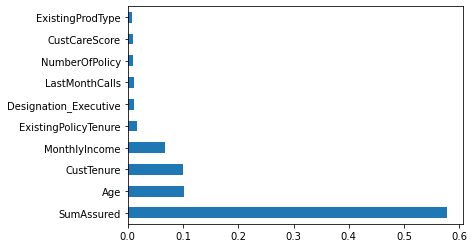

In [161]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [162]:
selected_X = df[['SumAssured','Age','MonthlyIncome','CustTenure','ExistingPolicyTenure','LastMonthCalls',
                'NumberOfPolicy','CustCareScore','ExistingProdType']]

In [163]:
selected_X

,SumAssured,Age,MonthlyIncome,CustTenure,ExistingPolicyTenure,LastMonthCalls,NumberOfPolicy,CustCareScore,ExistingProdType
0,13.600783,22.0,9.951944,4.0,0.693147,5,2.0,2.0,3
1,12.593041,11.0,9.909967,2.0,1.098612,7,4.0,3.0,4
2,13.269017,26.0,9.746249,4.0,0.693147,0,3.0,3.0,4
3,12.501109,11.0,9.793059,13.0,0.693147,0,3.0,5.0,3
4,12.811495,6.0,9.823795,13.0,1.386294,2,4.0,5.0,3
...,...,...,...,...,...,...,...,...,...
4515,13.363697,4.0,10.179413,8.0,0.693147,9,2.0,1.0,4
4516,12.600858,9.0,9.951849,9.0,1.098612,1,2.0,3.0,2
4517,13.411101,23.0,9.980726,23.0,0.693147,4,5.0,1.0,5
4518,13.757880,10.0,9.906882,10.0,1.791759,1,2.0,5.0,4


In [164]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(selected_X, y, test_size = 0.2, random_state=42)

In [166]:
model = LinearRegression()
model.fit(X_train1, y_train1)

LinearRegression()

In [167]:
y_pred2 = model.predict(X_test1)

In [168]:
from sklearn.metrics import r2_score

r_squared2 = r2_score(y_test1, y_pred2)

In [169]:
r_squared2

0.7677791792305781

In [170]:
from sklearn import metrics

print('Mean square error: ', metrics.mean_absolute_error(y_test1, y_pred2))

Mean square error:  0.128306235042258


In [171]:
print('Root mean square error', metrics.mean_squared_error(y_test1, y_pred2))

Root mean square error 0.02550205325408427


In [172]:
## We want to predict Agent bonus based on the data given of the agent. After feature selection, selected features are continuous.

In [173]:
import numpy as np

def mean_absolute_percentage_error(y_test2, y_pred2): 
    y_test2, y_pred2 = np.array(y_test2), np.array(y_pred2)
    return np.mean(np.abs((y_test2 - y_pred2) / y_test2)) * 100

In [174]:
mean_absolute_percentage_error(y_test1, y_pred2)

1.568997870555702

In [175]:
## R-squared value shows that the independent variable even though they are significant, is not telling much about dependent variable. 

In [176]:
## with and without feaqture selection, the r-squared vlue doesnt seems to be changing much. What's the problem here? Wy only 76%.
## All the variables after featire selection are significant in the model. But the model is not fitting that much. It shows that 
## independent variable are highly correlated with dependent variable, but not explaining much of the variability about the dependent variable.

In [177]:
## MAPE is < 10% meaning, model is highly accuratly forecasting. One of the reason for low R-squared could be less number of features, and less number of data. Model need more data to come to the conclusion.

In [178]:
## Ensembled techniques

In [179]:
## there are many ensembeled algorithms. bagging(Random forest), boosting

In [180]:
##  Random forest

In [181]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from numpy import mean
from numpy import std

In [182]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()
# Train the model on training data
rf.fit(X_train1, y_train1)

C:\Users\DHRUPTI PATEL\AppData\Local\Temp\ipykernel_15812\1729050509.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train1, y_train1)


RandomForestRegressor()

In [184]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test1)
predictions=predictions.reshape(866, 1)
# Calculate the absolute errors
errors = abs(predictions - y_test1)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: AgentBonus    0.11
dtype: float64 degrees.


C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [185]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test1)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: AgentBonus    98.71
dtype: float64 %.


In [186]:
print(r2_score(y_test1,predictions).round(2))

0.83


In [187]:
## XGBoost

# plot feature importance manually
from xgboost import XGBRegressor

# fit model no training data
model = XGBRegressor()
model.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [188]:
y_pred3 = model.predict(X_test1)

In [189]:
r2_score(y_test1, y_pred3).round(2)

0.82

In [602]:
import pickle

In [603]:
# open a file, where you ant to store the data
file = open('random_forest_regression.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)